### Optimization Attempt: Preprocessing the Data for a Neural Network

In [1]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

from sklearn.preprocessing import MinMaxScaler
import numpy as np

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [2]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
application_df = application_df.drop(["EIN","NAME"],axis =1)

In [3]:
# Determine the number of unique values in each column.
application_df.nunique()

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [4]:
# Look at APPLICATION_TYPE value counts for binning
apps_counts = application_df.APPLICATION_TYPE.value_counts()
apps_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

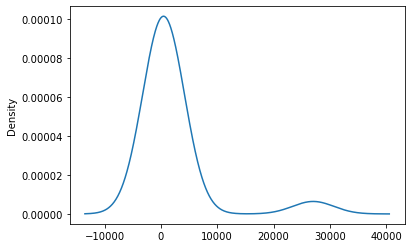

In [5]:
# Visualize the value counts of APPLICATION_TYPE
apps_counts.plot.density()

In [6]:
# Determine which values to replace if counts are less than ...?
replace_apps = list(apps_counts[apps_counts < 500].index)

# Replace in dataframe
for app in replace_apps:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [7]:
# Look at CLASSIFICATION value counts for binning
class_counts=application_df.CLASSIFICATION.value_counts()
class_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

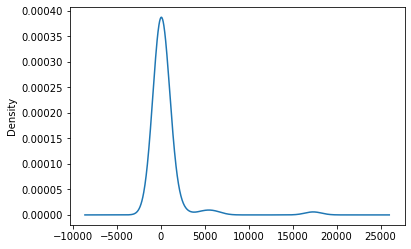

In [8]:
# Visualize the value counts of CLASSIFICATION
class_counts.plot.density()

In [9]:
# Determine which values to replace if counts are less than ..?
replace_class = list(class_counts[class_counts < 1000].index)

# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [10]:
# Generate our categorical variable lists
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()

In [11]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names_out(application_cat)
encode_df.head()

,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [12]:
# Merge one-hot encoded features and drop the originals
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,axis=1)
application_df.head()

,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [13]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [14]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

#### Compile, Train and Evaluate the Model ---> Increasing hidden nodes

In [15]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 80
hidden_nodes_layer2 = 30
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))

# Third hidden layer
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="tanh"))

# Output layer
nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 80)                3520      
                                                                 
 dense_1 (Dense)             (None, 30)                2430      
                                                                 
 dense_2 (Dense)             (None, 10)                310       
                                                                 
 dense_3 (Dense)             (None, 1)                 11        
                                                                 
Total params: 6,271
Trainable params: 6,271
Non-trainable params: 0
_________________________________________________________________


In [16]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights1.{epoch:02d}.hdf5"

In [17]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5674 - accuracy: 0.7217
Epoch 2/50
804/804 [==============================] - 1s 909us/step - loss: 0.5537 - accuracy: 0.7298
Epoch 3/50
804/804 [==============================] - 1s 861us/step - loss: 0.5506 - accuracy: 0.7310
Epoch 4/50
804/804 [==============================] - 1s 863us/step - loss: 0.5493 - accuracy: 0.7341
Epoch 5/50
755/804 [===========================>..] - ETA: 0s - loss: 0.5482 - accuracy: 0.7336
Epoch 5: saving model to checkpoints\weights1.05.hdf5
804/804 [==============================] - 1s 891us/step - loss: 0.5481 - accuracy: 0.7337
Epoch 6/50
804/804 [==============================] - 1s 871us/step - loss: 0.5472 - accuracy: 0.7339
Epoch 7/50
804/804 [==============================] - 1s 865us/step - loss: 0.5467 - accuracy: 0.7334
Epoch 8/50
804/804 [==============================] - 1s 864us/step - loss: 0.5456 - accuracy: 0.7355
Epoch 9/50
804/804 [===========================

<AxesSubplot:>

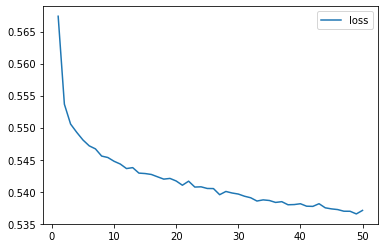

In [18]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")


<AxesSubplot:>

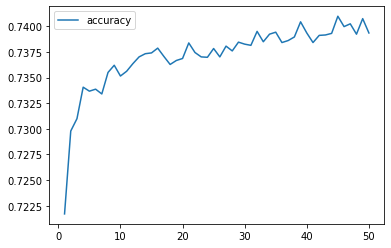

In [19]:
# Plot the accuracy
history_df.plot(y="accuracy")

#### Attempt 2

In [20]:
# Drop inactive organizations.
application2_df=application_df[application_df.STATUS != 0]

In [21]:
# Split our preprocessed data into our features and target arrays
y = application2_df.IS_SUCCESSFUL.values
X = application2_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [22]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [23]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 90
hidden_nodes_layer2 = 10

nn_new = tf.keras.models.Sequential()

# First hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_new.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="sigmoid"))

# Output layer
nn_new.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 90)                3960      
                                                                 
 dense_5 (Dense)             (None, 10)                910       
                                                                 
 dense_6 (Dense)             (None, 1)                 11        
                                                                 
Total params: 4,881
Trainable params: 4,881
Non-trainable params: 0
_________________________________________________________________


In [24]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights2.{epoch:02d}.hdf5"

In [25]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="Nadam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
804/804 [==============================] - 2s 1ms/step - loss: 0.5402 - accuracy: 0.7365
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5388 - accuracy: 0.7376
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5385 - accuracy: 0.7384
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5381 - accuracy: 0.7378
Epoch 5/50
781/804 [============================>.] - ETA: 0s - loss: 0.5390 - accuracy: 0.7368
Epoch 5: saving model to checkpoints\weights2.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5386 - accuracy: 0.7373
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5380 - accuracy: 0.7384
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5386 - accuracy: 0.7384
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5376 - accuracy: 0.7374
Epoch 9/50
804/804 [==============================] - 1s 1ms/

<AxesSubplot:>

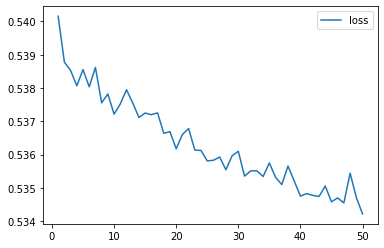

In [26]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

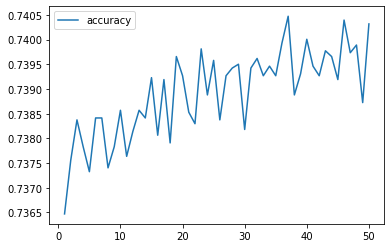

In [27]:
# Plot the accuracy
history_df.plot(y="accuracy")

In [28]:
# Export our model to HDF5 file
nn_new.save("AlphabetSoupCharity_Optimzation.h5")

#### Attempt 3

In [29]:
# Split our preprocessed data into our features and target arrays
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values

# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [30]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [31]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
number_input_features = len(X_train[0])
hidden_nodes_layer1 = 100
hidden_nodes_layer2 = 20

nn_new1 = tf.keras.models.Sequential()

# First hidden layer
nn_new1.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
nn_new1.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="selu"))

# Output layer
nn_new1.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model
nn_new1.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_7 (Dense)             (None, 100)               4400      
                                                                 
 dense_8 (Dense)             (None, 20)                2020      
                                                                 
 dense_9 (Dense)             (None, 1)                 21        
                                                                 
Total params: 6,441
Trainable params: 6,441
Non-trainable params: 0
_________________________________________________________________


In [32]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights3.{epoch:02d}.hdf5"

In [33]:
# Compile the model
nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every 5 epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch',
    period=5)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=50,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5371 - accuracy: 0.7394
Epoch 2/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5359 - accuracy: 0.7400
Epoch 3/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5358 - accuracy: 0.7404
Epoch 4/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5354 - accuracy: 0.7412
Epoch 5/50
774/804 [===========================>..] - ETA: 0s - loss: 0.5354 - accuracy: 0.7403
Epoch 5: saving model to checkpoints\weights3.05.hdf5
804/804 [==============================] - 1s 1ms/step - loss: 0.5353 - accuracy: 0.7404
Epoch 6/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5348 - accuracy: 0.7409
Epoch 7/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5363 - accuracy: 0.7402
Epoch 8/50
804/804 [==============================] - 1s 1ms/step - loss: 0.5350 - accuracy: 0.7407
Epoch 9/50
804/804 [==============================] - 1s 1ms/

<AxesSubplot:>

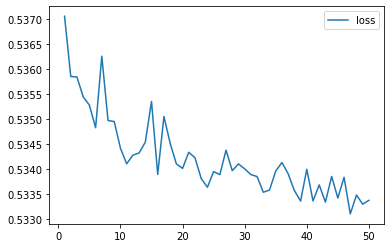

In [34]:
# Create a DataFrame containing training history
history_df = pd.DataFrame(fit_model.history, index=range(1,len(fit_model.history["loss"])+1))

# Plot the loss
history_df.plot(y="loss")

<AxesSubplot:>

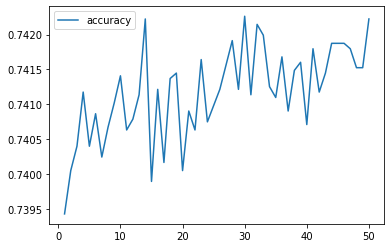

In [35]:
# Plot the accuracy
history_df.plot(y="accuracy")